<h1>Datos para probar las técnicas de analísis.</h1>
<h2>Los pasos que intentare seguir para tener una metodología son:</h2> 
<br>
<li>Paso cero: Extraccion de los datos, limpieza, reducción y eliminación en los casos que apliquen.</li>
<li>Paso uno: Estandarizar, normalizar y/o reducir los datos.</li>
<li>Paso dos: Codificar las variables categoricas.</li>
<li>Paso tres: Escojer el médelo de machine learning que nos ayude a resolver el problema.</li>

In [1]:
#Import las primeras librerias que podriamos utilizar
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Cargemos la información de lso vinos
matriz = pd.read_csv("Wine.csv")

In [4]:
#Colocar indice al dataframe matriz.
indice = np.arange(0,matriz.shape[0])
matriz = matriz.reindex( indice )
#Revisar la matriz.
print("\nTamaño de la matriz: \n ", matriz.shape )
print("\nPrimeras filas de la matriz: \n ",  matriz.head(2) )
#Cuantificar la cantidad de datos perdidos para determinar si los eliminamos, rellenamos, etc.
print("\nCantidad de datos faltantes: \n ", matriz.isnull().sum()  )
print("\nCantidad de datos faltantes en porcentaje \n", matriz.isnull().sum()/matriz.shape[0]*100)
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", matriz.info() )
#Revisar algunas estadisticas basicas.
print("\nEstadisticas basicas: \n ", matriz.describe() ) 


Tamaño de la matriz: 
  (1143, 13)

Primeras filas de la matriz: 
     fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
0           7.4             0.70         0.0            1.9      0.076   
1           7.8             0.88         0.0            2.6      0.098   

   freesulfurdioxide  totalsulfurdioxide  density    pH  sulphates  alcohol  \
0               11.0                34.0   0.9978  3.51       0.56      9.4   
1               25.0                67.0   0.9968  3.20       0.68      9.8   

   quality  Id  
0        5   0  
1        5   1  

Cantidad de datos faltantes: 
  fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
Id                    0
dtype: int64

Cantidad de datos faltantes en porcentaje 
 fixedacidity    

array([[<AxesSubplot:title={'center':'fixedacidity'}>,
        <AxesSubplot:title={'center':'volatileacidity'}>,
        <AxesSubplot:title={'center':'citricacid'}>,
        <AxesSubplot:title={'center':'residualsugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'freesulfurdioxide'}>,
        <AxesSubplot:title={'center':'totalsulfurdioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'Id'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

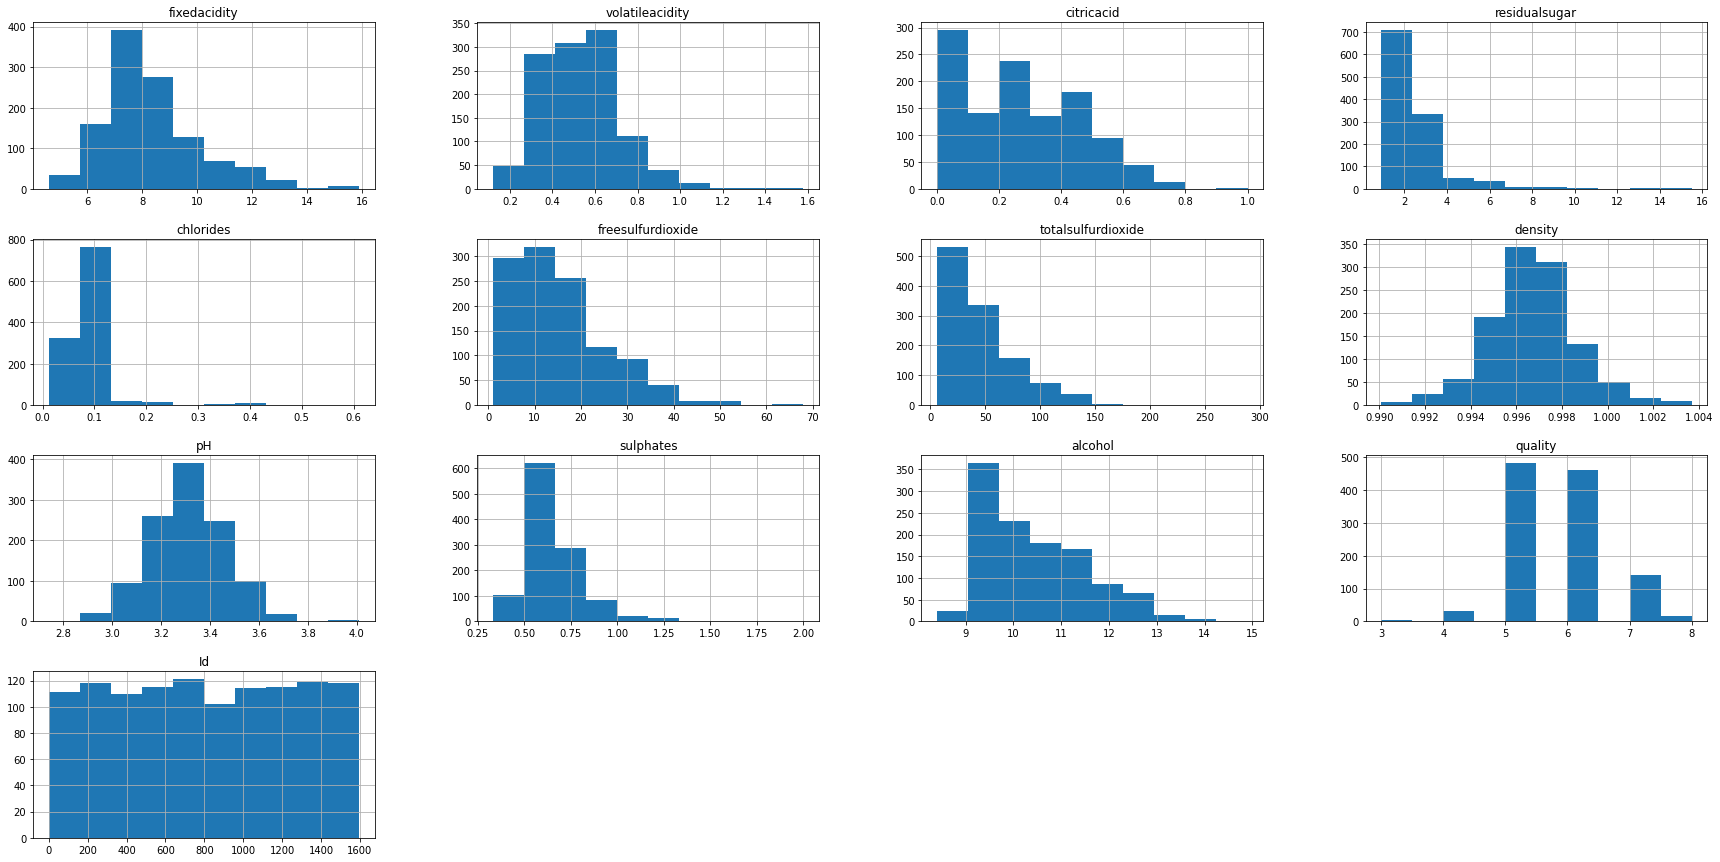

In [5]:
#Revisar la forma de las variables.
matriz.hist( figsize=(30,15) )

In [6]:
#Separemos las columnas numericas de las categoricas. Como lo índica la matriz.
columnas_categoricas = matriz.select_dtypes("object")
columnas_numericas = matriz.select_dtypes(np.number)
print("\nVariables numericas: \n ", columnas_numericas.columns )
print("\nVariables categoricas: \n ", columnas_categoricas.columns )

# Hay un módulo que nos ayuda a realizar esta acción.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Hay que mirar como quedan las variable categoricas codificadas.
for columna in columnas_categoricas:
    print('\nNombre de la columna:', "\n", columna)    
    matriz[columna] = matriz[[columna]].apply(encoder.fit_transform)
    for i in range(len(encoder.classes_)):
        print(encoder.classes_[i],':', i)


Variables numericas: 
  Index(['fixedacidity', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

Variables categoricas: 
  Index([], dtype='object')


In [7]:
#Aquí verificamos como todas las varibales ahora son numericas, tanto numeros enteros como continuos.
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", matriz.info() )
#Revisar algunas estadisticas basicas.
print("\nEstadisticas basicas: \n ", matriz.describe() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        1143 non-null   float64
 1   volatileacidity     1143 non-null   float64
 2   citricacid          1143 non-null   float64
 3   residualsugar       1143 non-null   float64
 4   chlorides           1143 non-null   float64
 5   freesulfurdioxide   1143 non-null   float64
 6   totalsulfurdioxide  1143 non-null   float64
 7   density             1143 non-null   float64
 8   pH                  1143 non-null   float64
 9   sulphates           1143 non-null   float64
 10  alcohol             1143 non-null   float64
 11  quality             1143 non-null   int64  
 12  Id                  1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 125.0 KB

Tipos de variables: 
  None

Estadisticas basicas: 
         fixedacidity  volatileacidity   citricacid 

<AxesSubplot:>

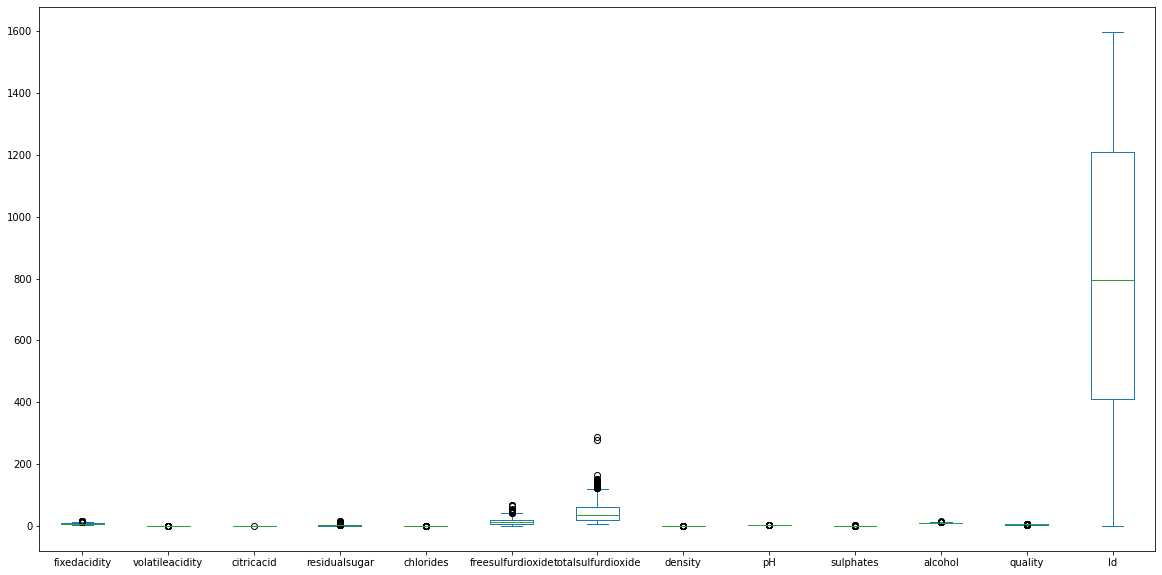

In [8]:
#Revisar los outliers.
matriz.plot( kind = "box", figsize=(20,10) ) 

In [9]:
#Vamos a remover los "outliers" en las columnas numericas que hacen el sesgo en los datos.
def remover_outliers(matriz, columnas):    
    for columna in columnas:
        q1 = matriz[columna].quantile(q = 0.25)
        q3 = matriz[columna].quantile(q = 0.75)
        interCuartil = q3 - q1
        rangoAlto = q3 + (1.5*interCuartil)
        rangoBajo = q1 - (1.5*interCuartil)
        matriz.loc[matriz[columna] > rangoAlto, columna] = np.nan
        matriz.loc[matriz[columna] < rangoBajo, columna] = np.nan
    return matriz.dropna()

<AxesSubplot:>

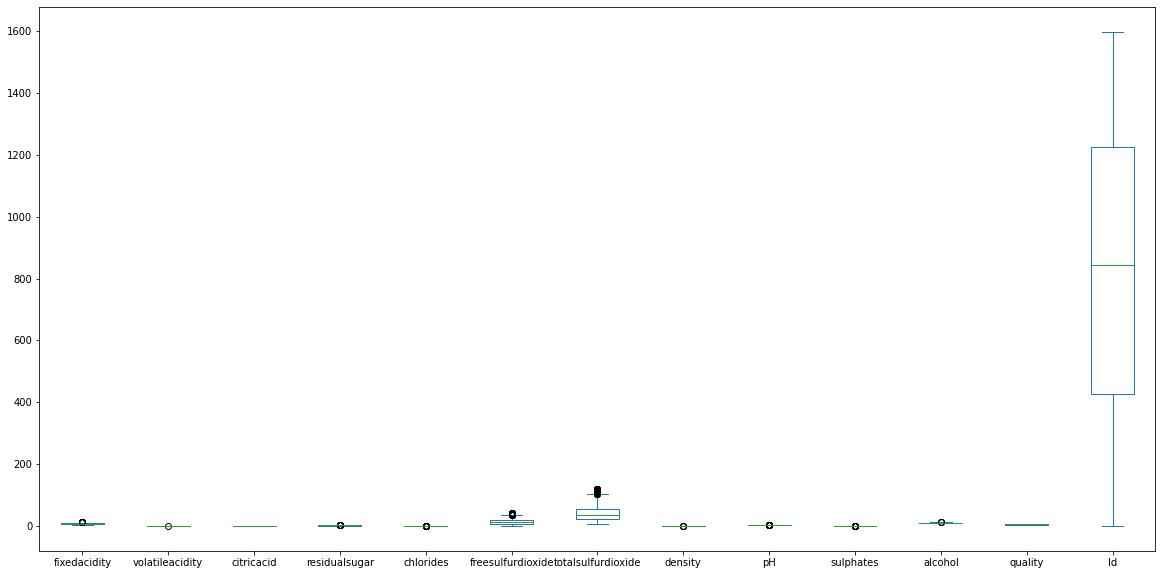

In [10]:
matriz = remover_outliers(matriz, columnas_numericas)
#Revisar los outliers.
matriz.plot( kind = "box", figsize=(20,10) )

C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Windows 10\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<AxesSubplot:>

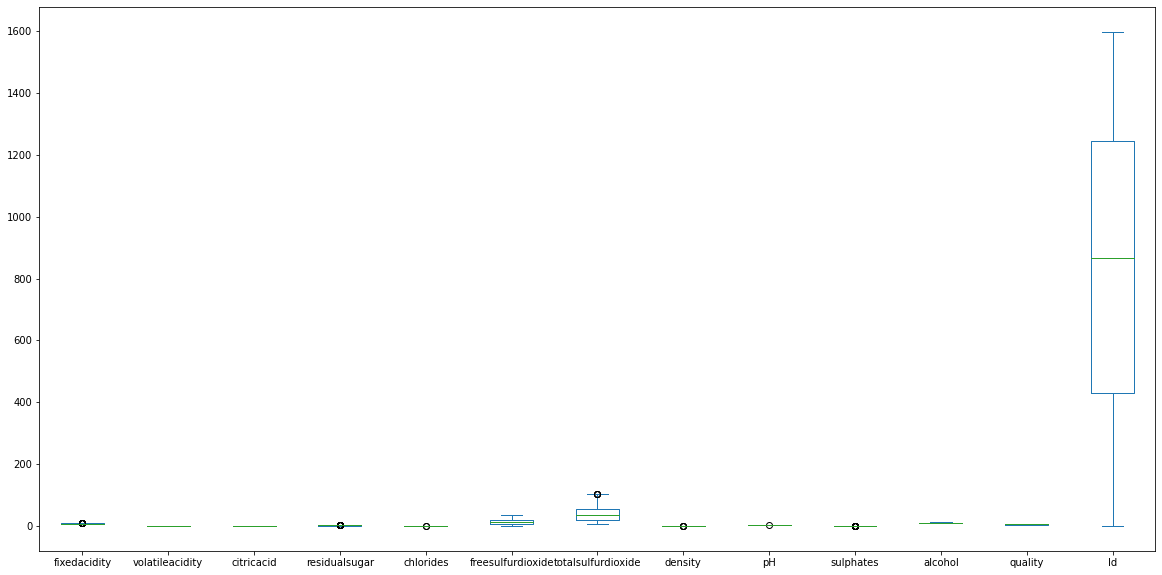

In [11]:
matriz = remover_outliers(matriz, columnas_numericas)
#Revisar los outliers.
matriz.plot( kind = "box", figsize=(20,10) )

<AxesSubplot:>

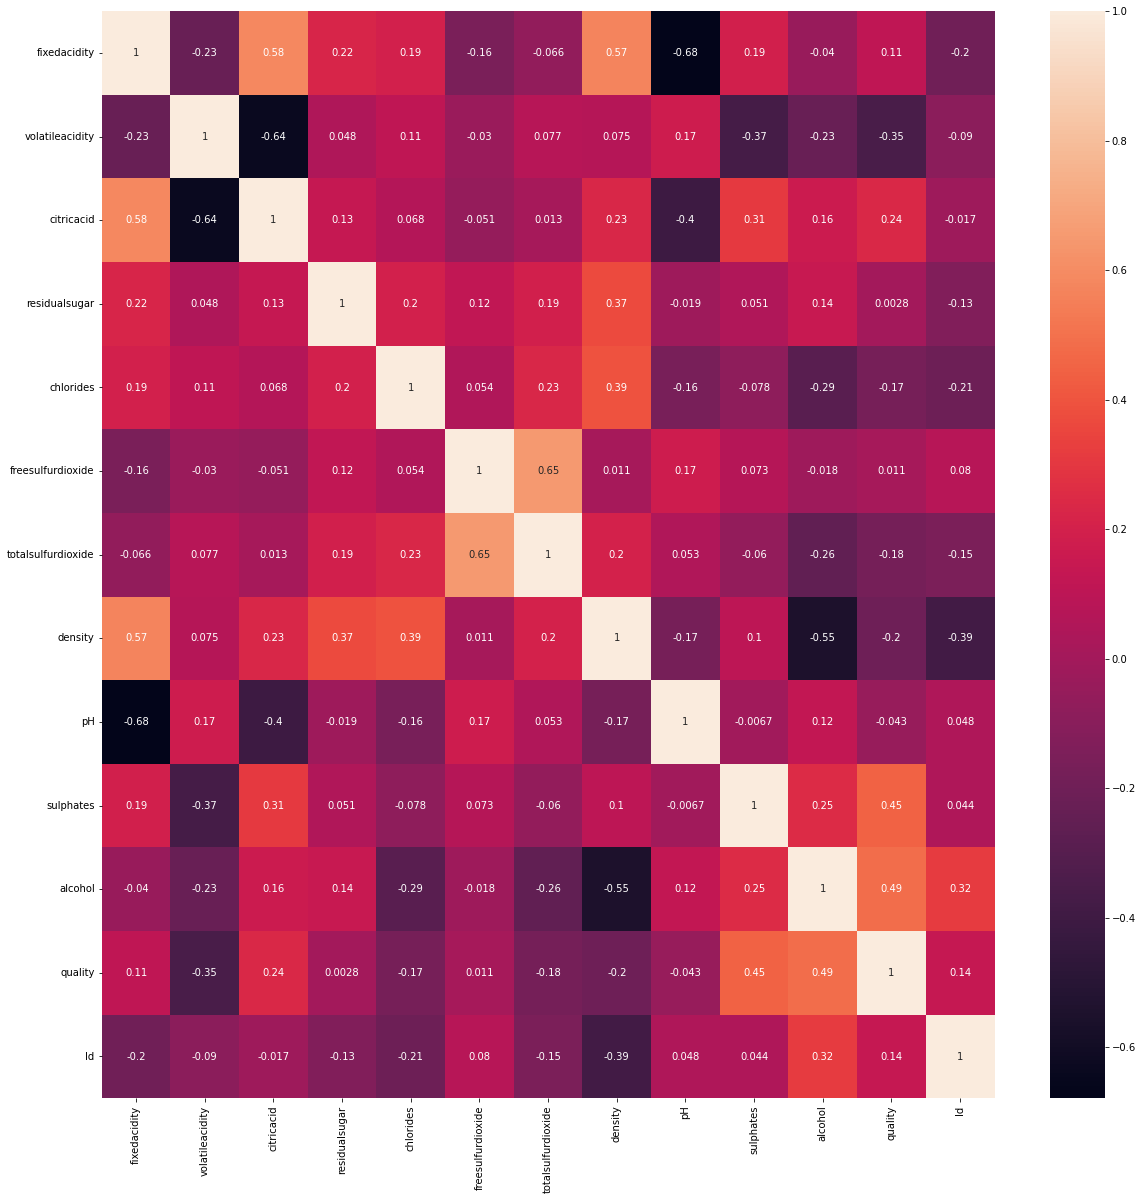

In [12]:
# Miremos la correlacion de cada variable
plt.figure(figsize=(20,20))  
corr = matriz.corr()
sns.heatmap(corr, annot= True)

In [13]:
#Vamos a standarizar los datos con variables continuas antes de aplicar el pca.
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
for columna in columnas_numericas:
    matriz[columna] = scalar.fit_transform(matriz[[columna]])
print("\nMatriz con datos dentrados: \n ", matriz.head(2) )
print("\nTipos de variables de la nueva matriz con datos centrados: \n ", matriz.info())


Matriz con datos dentrados: 
     fixedacidity  volatileacidity  citricacid  residualsugar  chlorides  \
0     -0.473913         1.020171   -1.333584      -0.644133  -0.147257   
1     -0.159633         2.107055   -1.333584       1.017776   1.570918   

   freesulfurdioxide  totalsulfurdioxide   density        pH  sulphates  \
0          -0.415200           -0.258132  0.861534  1.413454   -0.57950   
1           1.333465            1.157040  0.198471 -1.062955    0.54612   

    alcohol   quality        Id  
0 -0.984699 -0.881874 -1.770893  
1 -0.565699 -0.881874 -1.768767  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        725 non-null    float64
 1   volatileacidity     725 non-null    float64
 2   citricacid          725 non-null    float64
 3   residualsugar       725 non-null    float64
 4   chlorides   

In [14]:
#Reducir la matriz para poder graficar los datos.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(matriz.values)
pcaEscalarReducido = pca.transform(matriz.values)
print("Dimensiones originales: {}".format(str(matriz.shape)))
print("Dimensiones reducidas: {}".format(str(pcaEscalarReducido.shape)))
matriz_pca_escalar = pd.DataFrame (pcaEscalarReducido , columns=["pc1","pc2"])
print("\nMatriz reducida por medio de pca: \n ", matriz_pca_escalar.head(2) )
print("\nTipos de variables de la nueva matriz con pca: \n ", matriz_pca_escalar.info())

Dimensiones originales: (725, 13)
Dimensiones reducidas: (725, 2)

Matriz reducida por medio de pca: 
          pc1      pc2
0 -1.118754 -2.27601
1  0.360433 -3.03416
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     725 non-null    float64
 1   pc2     725 non-null    float64
dtypes: float64(2)
memory usage: 11.5 KB

Tipos de variables de la nueva matriz con pca: 
  None


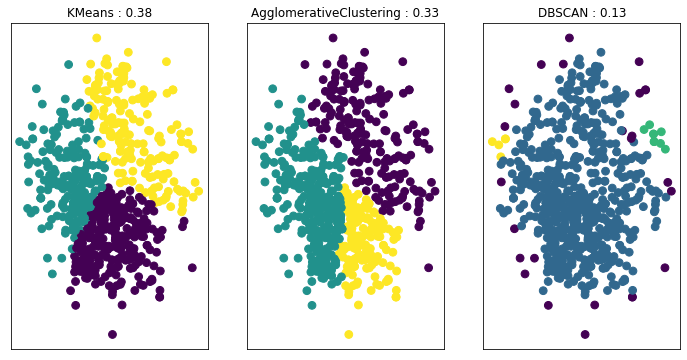

In [15]:
#Apliquemos los algoritmos a esa matriz.
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
fig, axes = plt.subplots(1, 3, figsize=(12, 6),subplot_kw={'xticks': (), 'yticks': ()})
algoritmos = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),DBSCAN()]
for ax, algoritmo in zip(axes, algoritmos):
    grupos = algoritmo.fit_predict(matriz_pca_escalar)
    df_grupos = pd.DataFrame( grupos, columns= ["Categorias"])
    df_matriz = pd.merge(matriz_pca_escalar, df_grupos, left_index= True, right_index= True, how = "inner")
    df_matriz.to_csv("wine_{}.csv".format(algoritmo))
    ax.scatter(matriz_pca_escalar.iloc[:, 0], matriz_pca_escalar.iloc[:, 1], c=grupos, cmap="viridis", s=60)
    ax.set_title("{} : {:.2f}".format(algoritmo.__class__.__name__,silhouette_score(matriz_pca_escalar, grupos)))